# **CS 181 HW4 Problem 2**
---

#### Initialize data:

In [148]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)  # download MNIST
N = 6000 

x = mnist_trainset.data[:N]  # select N datapoints
x = x.flatten(1)             # flatten the images
x = x.float()                # convert pixels from uint8 to float
x = x.numpy()              # uncomment to use numpy (optional)

#### **Todo:** implement PCA

*Hint: see `.linalg.svd()`*

In [189]:
# Perform principal component analysis
def pca(x, n_comps=500):
    # Center the data
    xc = x - np.mean(x, axis=0)
    # Perform SVD on centered data matrix
    u, s, vt = np.linalg.svd(xc, full_matrices=False)
    # Get top eigenvalues by converting from the singular values
    top_eigvals = s[:n_comps] ** 2 / x.shape[0]
    # Get top principal components
    top_pcomps = vt[:n_comps, :]
    return top_eigvals, top_pcomps

#### **Todo:** calculate cumulative fraction of variance

*Hint: see `.cumsum()`*

In [190]:
# Calculate cumulative fractional variance
def calc_cfvs(eigvals):
    # Fraction of variance explained by each eigenvector
    cum_frac_vars = np.cumsum(eigvals / np.sum(eigvals))
    return cum_frac_vars

#### **Todo:** calculate mean squared L2 norm reconstruction loss

In [191]:
# Helper function to return average L_2 squared norm of rows in matrix
avg_sqnorm = lambda X: np.sum(np.linalg.norm(X, axis=1)**2) / X.shape[0]

def calc_errs(x, pcomps):
    # Error w.r.t. setting each row to the mean
    err_mean = avg_sqnorm(x - np.mean(x, axis=0))
    # Center the data for PCA
    xc = x - np.mean(x, axis=0)
    # Projectingm centered data onto first 10 principal components
    U = pcomps[:10, :].T  # convention is to have U of shape D x K
    z = xc @ U
    # Error w.r.t. reconstruction from projection: z.U
    err_pcomp = avg_sqnorm(xc - z @ U.T)
    return err_mean, err_pcomp

#### Plot and print errors:

In [192]:
def plot_pic(pic, ax, title=''):
    x = pic.reshape(28, 28)
    ax.imshow(x, cmap='binary')
    ax.set_title(title)
    ax.axis('off')

def make_plots(eigvals, cfvs, x_mean, pcomps):
    # plot eigenvals and cfvs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.plot(eigvals, color='tomato')
    ax1.set_title('Eigenvalues')
    ax2.plot(cfvs, color='tomato')
    ax2.set_title('CFVs')
    fig.savefig('p2_cfvs.pdf')

    # plot mean
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    plot_pic(x_mean, ax, title='Mean')
    fig.savefig('p2_mean.pdf')

    # plot top 10 pcomps
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        plot_pic(pcomps[i], axes.flat[i], title=f'PC index {i}')
    fig.savefig('p2_pcomps.pdf')

Reconstruction error (using mean): 3.436023e+06
Reconstruction error (using top 10 pcomps): 1.731315e+06


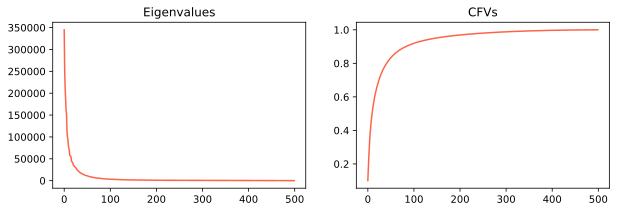

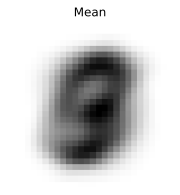

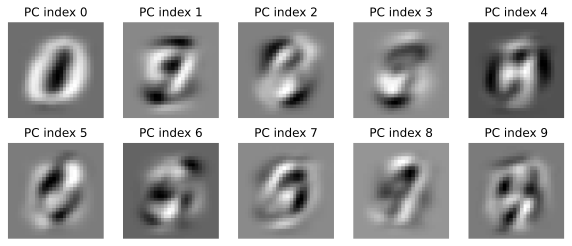

In [193]:
# do PCA    
eigvals, pcomps = pca(x)

# calculate CFVs
fcvs = calc_cfvs(eigvals)

# print errors
err_mean, err_pcomp = calc_errs(x, pcomps)
print(f'Reconstruction error (using mean): {err_mean:3e}')
print(f'Reconstruction error (using top 10 pcomps): {err_pcomp:3e}')

# make plots
make_plots(eigvals, fcvs, x.mean(0), pcomps)